In [2]:
print ("Hello world")

Hello world


In [73]:
## Working: for one batch of videos (one rat, one stimulation type, multiple frequencies)

import pandas as pd
import numpy as np
import openpyxl
from openpyxl import load_workbook
from datetime import datetime
import os
from sklearn.preprocessing import StandardScaler


# # Define the list of stimulations, rats, frequencies, files etc.
stim = ['TIS']
rats = ['Trial 240125']
delta_frequencies = [10, 20, 30]
frequency_filenames = [
    '2-and-2-001-kHz-continuousDLC_resnet50_PNS Trial 240125Feb20shuffle1_3500_filtered.csv',
    '2-and-2-002-kHz-continuousDLC_resnet50_PNS Trial 240125Feb20shuffle1_3500_filtered.csv',
    '2-and-2-003-kHz-continuousDLC_resnet50_PNS Trial 240125Feb20shuffle1_3500_filtered.csv' 
    ]

# List to store individual DataFrames
dfs = []

# Iterate over rats and frequencies
for stim_type in stim:
    for rat in rats:
        for freq, freq_filename in zip(delta_frequencies, frequency_filenames):
            
            # Check if the file exists
            if os.path.exists(freq_filename):
                # Read the CSV file
                df = pd.read_csv(freq_filename)

                # Add a new columns with constant values across rows
                df['Animal ID'] = rat
                df['Stim type'] = stim_type
                df['Stim Freq'] = freq

                # Extract time column
                time_column = df['Time']

                # Define body parts and their sub-columns
                body_parts = ['Hip', 'Knee', 'Ankle', 'Heel (ventral)', 'Instep (dorsal)', 'Toe 1 (Proximal Thumb)', 'Toe 2', 'Toe 3 (Middle)', 'Toe 4', 'Toe 5 (Distal Pinky)']
                sub_columns = ['x', 'y', 'likelihood']

                # Create a dictionary to store all body parts data
                body_parts_data = {}

                # Create a StandardScaler object
                scaler = StandardScaler()

                # Iterate over body parts
                for part in body_parts:
                    part_data = {}
                    for sub_column in sub_columns:
                        column_name = f'{part} {sub_column}'
                        if sub_column in ['x', 'y']:  # Only normalize x and y
                            # Create new column name for normalized data
                            normalized_column_name = f'{part} {sub_column} normalized'
                            # Normalize the data and append to the DataFrame
                            df[normalized_column_name] = scaler.fit_transform(df[[column_name]])
                        part_data[sub_column] = df[column_name]
                    body_parts_data[part] = part_data
            
                # Append the DataFrame to the list
                dfs.append(df)

            else:
                print(f'File {freq_filename} not found.')

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Re-arrange the columns
cols = df.columns.tolist()
cols.remove('Animal ID')
cols.remove('Stim type')
cols.remove('Stim Freq')
cols.remove('Time')

df = df[['Animal ID', 'Stim type', 'Stim Freq', 'Time'] + cols]

In [ ]:
## NOT WORKING: for multiple batch of videos (multiple rats, multiple stimulation types, multiple frequencies)


import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# Define the dictionary of stimulations and rats
stim_to_rat = {'Biphasic': 'Trial 240114', 'TIS': 'Trial 240125'}

# Define the dictionary of frequencies and filenames for each stimulation type
freq_to_filename_BIS = {
    9: '9_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv',
    30: '30_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv',
    90: '90_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv',
    120: '120_kSa_3p3_V_-340mV_offsetDLC_resnet50_ece2500yJan17shuffle1_100000_filtered.csv'
}

freq_to_filename_TIS = {
    10: '2-and-2-001-kHz-continuousDLC_resnet50_PNS Trial 240125Feb20shuffle1_3500_filtered.csv',
    20: '2-and-2-002-kHz-continuousDLC_resnet50_PNS Trial 240125Feb20shuffle1_3500_filtered.csv',
    30: '2-and-2-003-kHz-continuousDLC_resnet50_PNS Trial 240125Feb20shuffle1_3500_filtered.csv'
}

# Define body parts and their sub-columns
body_parts = ['Hip', 'Knee', 'Ankle', 'Heel (ventral)', 'Instep (dorsal)', 'Toe 1 (Proximal Thumb)', 'Toe 2', 'Toe 3 (Middle)', 'Toe 4', 'Toe 5 (Distal Pinky)']
sub_columns = ['x', 'y', 'likelihood']

# Create a StandardScaler object
scaler = StandardScaler()

# Function to create a DataFrame for a given stimulation type and frequency to filename dictionary
def create_df(stim_type, rat, freq_to_filename):
    # Iterate over frequencies and filenames
    for freq, freq_filename in freq_to_filename.items():
        # Create the file path
        file_path = os.path.join('path_to_your_files', freq_filename)
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Add a new columns with constant values across rows
            df['Animal ID'] = rat
            df['Stim type'] = stim_type
            df['Stim Freq'] = freq

            # Normalize the 'x' and 'y' columns for all body parts
            for part in body_parts:
                for sub_column in ['x', 'y']:  # Only normalize 'x' and 'y'
                    column_name = f'{part} {sub_column}'
                    normalized_column_name = f'{part} {sub_column} normalized'
                    df[normalized_column_name] = scaler.fit_transform(df[[column_name]])

            # If this is the first DataFrame, assign it to df_final, else concatenate it with df_final
            if 'df_final' in locals():
                df_final = pd.concat([df_final, df], ignore_index=True)
            else:
                df_final = df
        else:
            print(f'File {file_path} not found.')
    
    return df_final

# Create df_BIS and df_TIS
df_BIS = create_df('Biphasic', stim_to_rat['Biphasic'], freq_to_filename_BIS)
df_TIS = create_df('TIS', stim_to_rat['TIS'], freq_to_filename_TIS)

In [74]:
# # Print to check data frame

# # Access a specific column
# body_parts_data['Hip']['x']

# Print the first few rows of the data frame
print(df.head())


      Animal ID Stim type  Stim Freq  Time       Hip x       Hip y  \
0  Trial 240125       TIS         10     0  907.364014  323.449097   
1  Trial 240125       TIS         10     1  907.364014  323.449097   
2  Trial 240125       TIS         10     2  907.364014  323.449097   
3  Trial 240125       TIS         10     3  906.955566  323.229004   
4  Trial 240125       TIS         10     4  902.333008  316.175140   

   Hip likelihood      Knee x      Knee y  Knee likelihood  ...  \
0        0.508190  565.053101  597.282776         0.979974  ...   
1        0.515557  565.239197  597.282776         0.979890  ...   
2        0.530301  565.239197  597.282776         0.979608  ...   
3        0.505865  565.053101  596.848633         0.979009  ...   
4        0.501654  565.017883  596.685608         0.978754  ...   

   Toe 1 (Proximal Thumb) x normalized  Toe 1 (Proximal Thumb) y normalized  \
0                            -0.850392                            -1.657157   
1                 

In [75]:
# Print column labels and their corresponding column numbers
for i, col_label in enumerate(df.columns):
    print(f"Column {i}: {col_label}")

Column 0: Animal ID
Column 1: Stim type
Column 2: Stim Freq
Column 3: Time
Column 4: Hip x
Column 5: Hip y
Column 6: Hip likelihood
Column 7: Knee x
Column 8: Knee y
Column 9: Knee likelihood
Column 10: Ankle x
Column 11: Ankle y
Column 12: Ankle likelihood
Column 13: Heel (ventral) x
Column 14: Heel (ventral) y
Column 15: Heel (ventral) likelihood
Column 16: Instep (dorsal) x
Column 17: Instep (dorsal) y
Column 18: Instep (dorsal) likelihood
Column 19: Toe 1 (Proximal Thumb) x
Column 20: Toe 1 (Proximal Thumb) y
Column 21: Toe 1 (Proximal Thumb) likelihood
Column 22: Toe 2 x
Column 23: Toe 2 y
Column 24: Toe 2 likelihood
Column 25: Toe 3 (Middle) x
Column 26: Toe 3 (Middle) y
Column 27: Toe 3 (Middle) likelihood
Column 28: Toe 4 x
Column 29: Toe 4 y
Column 30: Toe 4 likelihood
Column 31: Toe 5 (Distal Pinky) x
Column 32: Toe 5 (Distal Pinky) y
Column 33: Toe 5 (Distal Pinky) likelihood
Column 34: Unnamed: 31
Column 35: Unnamed: 32
Column 36: Hip x normalized
Column 37: Hip y normalize

In [80]:
# Create new data frame for Linear Mixed Model (LMM)

new_df = df.copy()
#new_df = new_df.drop(new_df.columns[4:36], axis=1) ## Drop the non-normalized coordinates and the NaN columns
new_df = new_df.drop(new_df.columns[34:56], axis=1) ## Drop the normalized coordinates and the NaN columns
new_df = new_df.drop(columns=[col for col in new_df.columns if 'likelihood' in col]) # Drop columns that contain 'likelihood' in the column name


# # Concatenate x and y coordinates for each body part
# for part in body_parts:
#     new_df[f'{part} Coordinates'] = list(zip(new_df[f'{part} x'], new_df[f'{part} y']))

# Edit column names for proper model syntax
new_df.columns = [col.replace('(', '').replace(')', '') for col in new_df.columns]
new_df.columns = [col.replace(' ', '_') for col in new_df.columns]

for i in range(4, len(new_df.columns)):
    new_df[f'{new_df.columns[i]}_lagged'] = new_df[new_df.columns[i]].shift(1)
    new_df.loc[new_df['Time'] == 0, f'{new_df.columns[i]}_lagged'] = new_df[new_df.columns[i]]




In [81]:
# Print column labels and their corresponding column numbers
for i, col_label in enumerate(new_df.columns):
    print(f"Column {i}: {col_label}")

Column 0: Animal_ID
Column 1: Stim_type
Column 2: Stim_Freq
Column 3: Time
Column 4: Hip_x
Column 5: Hip_y
Column 6: Knee_x
Column 7: Knee_y
Column 8: Ankle_x
Column 9: Ankle_y
Column 10: Heel_ventral_x
Column 11: Heel_ventral_y
Column 12: Instep_dorsal_x
Column 13: Instep_dorsal_y
Column 14: Toe_1_Proximal_Thumb_x
Column 15: Toe_1_Proximal_Thumb_y
Column 16: Toe_2_x
Column 17: Toe_2_y
Column 18: Toe_3_Middle_x
Column 19: Toe_3_Middle_y
Column 20: Toe_4_x
Column 21: Toe_4_y
Column 22: Toe_5_Distal_Pinky_x
Column 23: Toe_5_Distal_Pinky_y
Column 24: Hip_x_lagged
Column 25: Hip_y_lagged
Column 26: Knee_x_lagged
Column 27: Knee_y_lagged
Column 28: Ankle_x_lagged
Column 29: Ankle_y_lagged
Column 30: Heel_ventral_x_lagged
Column 31: Heel_ventral_y_lagged
Column 32: Instep_dorsal_x_lagged
Column 33: Instep_dorsal_y_lagged
Column 34: Toe_1_Proximal_Thumb_x_lagged
Column 35: Toe_1_Proximal_Thumb_y_lagged
Column 36: Toe_2_x_lagged
Column 37: Toe_2_y_lagged
Column 38: Toe_3_Middle_x_lagged
Column

In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4674 entries, 0 to 4673
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Animal_ID                      4674 non-null   object 
 1   Stim_type                      4674 non-null   object 
 2   Stim_Freq                      4674 non-null   int64  
 3   Time                           4674 non-null   int64  
 4   Hip_x                          4674 non-null   float64
 5   Hip_y                          4674 non-null   float64
 6   Knee_x                         4674 non-null   float64
 7   Knee_y                         4674 non-null   float64
 8   Ankle_x                        4674 non-null   float64
 9   Ankle_y                        4674 non-null   float64
 10  Heel_ventral_x                 4674 non-null   float64
 11  Heel_ventral_y                 4674 non-null   float64
 12  Instep_dorsal_x                4674 non-null   f

In [84]:
## Linear Mixed Model (LMM)

import statsmodels.api as sm
import statsmodels.formula.api as smf


# Define outcome, fixed and random effects
    
# outcome = ['Hip_x_normalized', 'Hip_y_normalized', 'Knee_x_normalized', 'Knee_y_normalized', 'Ankle_x_normalized', 'Ankle_y_normalized',
#             'Heel_ventral_x_normalized','Heel_ventral_y_normalized', 'Instep_dorsal_x_normalized','Instep_dorsal_y_normalized', 
#             'Toe_1_Proximal_Thumb_x_normalized', 'Toe_1_Proximal_Thumb_y_normalized', 'Toe_2_x_normalized', 'Toe_2_y_normalized', 
#             'Toe_3_Middle_x_normalized', 'Toe_3_Middle_y_normalized', 'Toe_4_x_normalized', 'Toe_4_y_normalized', 
#             'Toe_5_Distal_Pinky_x_normalized', 'Toe_5_Distal_Pinky_y_normalized']

outcome = ['Hip_x', 'Hip_y', 'Knee_x', 'Knee_y', 'Ankle_x', 'Ankle_y', 'Heel_ventral_x','Heel_ventral_y', 
           'Instep_dorsal_x','Instep_dorsal_y', 'Toe_1_Proximal_Thumb_x', 'Toe_1_Proximal_Thumb_y', 'Toe_2_x', 'Toe_2_y', 
           'Toe_3_Middle_x', 'Toe_3_Middle_y', 'Toe_4_x', 'Toe_4_y', 'Toe_5_Distal_Pinky_x', 'Toe_5_Distal_Pinky_y']


fixed_effects = ['Stim_type', 
                 'Stim_Freq', 
                 'Time']

random_effects = ['Animal ID']

# # Construct and fit model formula with joined outcomes - ValueError: endog has evaluated to an array with multiple columns that has shape (4674, 20). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

# formula = ' + '.join(outcome) + f" ~ {' + '.join(fixed_effects)}"
# print(f"Formula: {formula}")
# md = sm.MixedLM.from_formula(formula, data=new_df, groups=random_effects)
# mdf = md.fit()
# print(model.summary())


# Construct and fit model formula with separate outcomes - LinAlgError: Singular matrix

models = []
for output in outcome:
    formula = f"{output} ~ {' + '.join(fixed_effects)} + {output}_lagged"
    print(f"Formula: {formula}")
    #md = sm.MixedLM.from_formula(formula, data=new_df, groups=random_effects) # Linear Mixed model
    #mdf = md.fit()
    md = smf.ols(formula, data=new_df).fit() # Ordinary Least Squares model
    models.append(md)

for model in models:
    print(model.summary())

## If I create a model for each outcome, I get a Singular matrix error. If I create a model for all outcomes, I get a ValueError: endog has evaluated to an array with multiple columns that has shape (4674, 20)
    
## Singular matrix error may be due to Stim_type and Animal ID having just one value each. I will try to remove them from the model and see if it works.
    

Formula: Hip_x ~ Stim_type + Stim_Freq + Time + Hip_x_lagged
Formula: Hip_y ~ Stim_type + Stim_Freq + Time + Hip_y_lagged
Formula: Knee_x ~ Stim_type + Stim_Freq + Time + Knee_x_lagged
Formula: Knee_y ~ Stim_type + Stim_Freq + Time + Knee_y_lagged
Formula: Ankle_x ~ Stim_type + Stim_Freq + Time + Ankle_x_lagged
Formula: Ankle_y ~ Stim_type + Stim_Freq + Time + Ankle_y_lagged
Formula: Heel_ventral_x ~ Stim_type + Stim_Freq + Time + Heel_ventral_x_lagged
Formula: Heel_ventral_y ~ Stim_type + Stim_Freq + Time + Heel_ventral_y_lagged
Formula: Instep_dorsal_x ~ Stim_type + Stim_Freq + Time + Instep_dorsal_x_lagged
Formula: Instep_dorsal_y ~ Stim_type + Stim_Freq + Time + Instep_dorsal_y_lagged
Formula: Toe_1_Proximal_Thumb_x ~ Stim_type + Stim_Freq + Time + Toe_1_Proximal_Thumb_x_lagged
Formula: Toe_1_Proximal_Thumb_y ~ Stim_type + Stim_Freq + Time + Toe_1_Proximal_Thumb_y_lagged
Formula: Toe_2_x ~ Stim_type + Stim_Freq + Time + Toe_2_x_lagged
Formula: Toe_2_y ~ Stim_type + Stim_Freq + Time

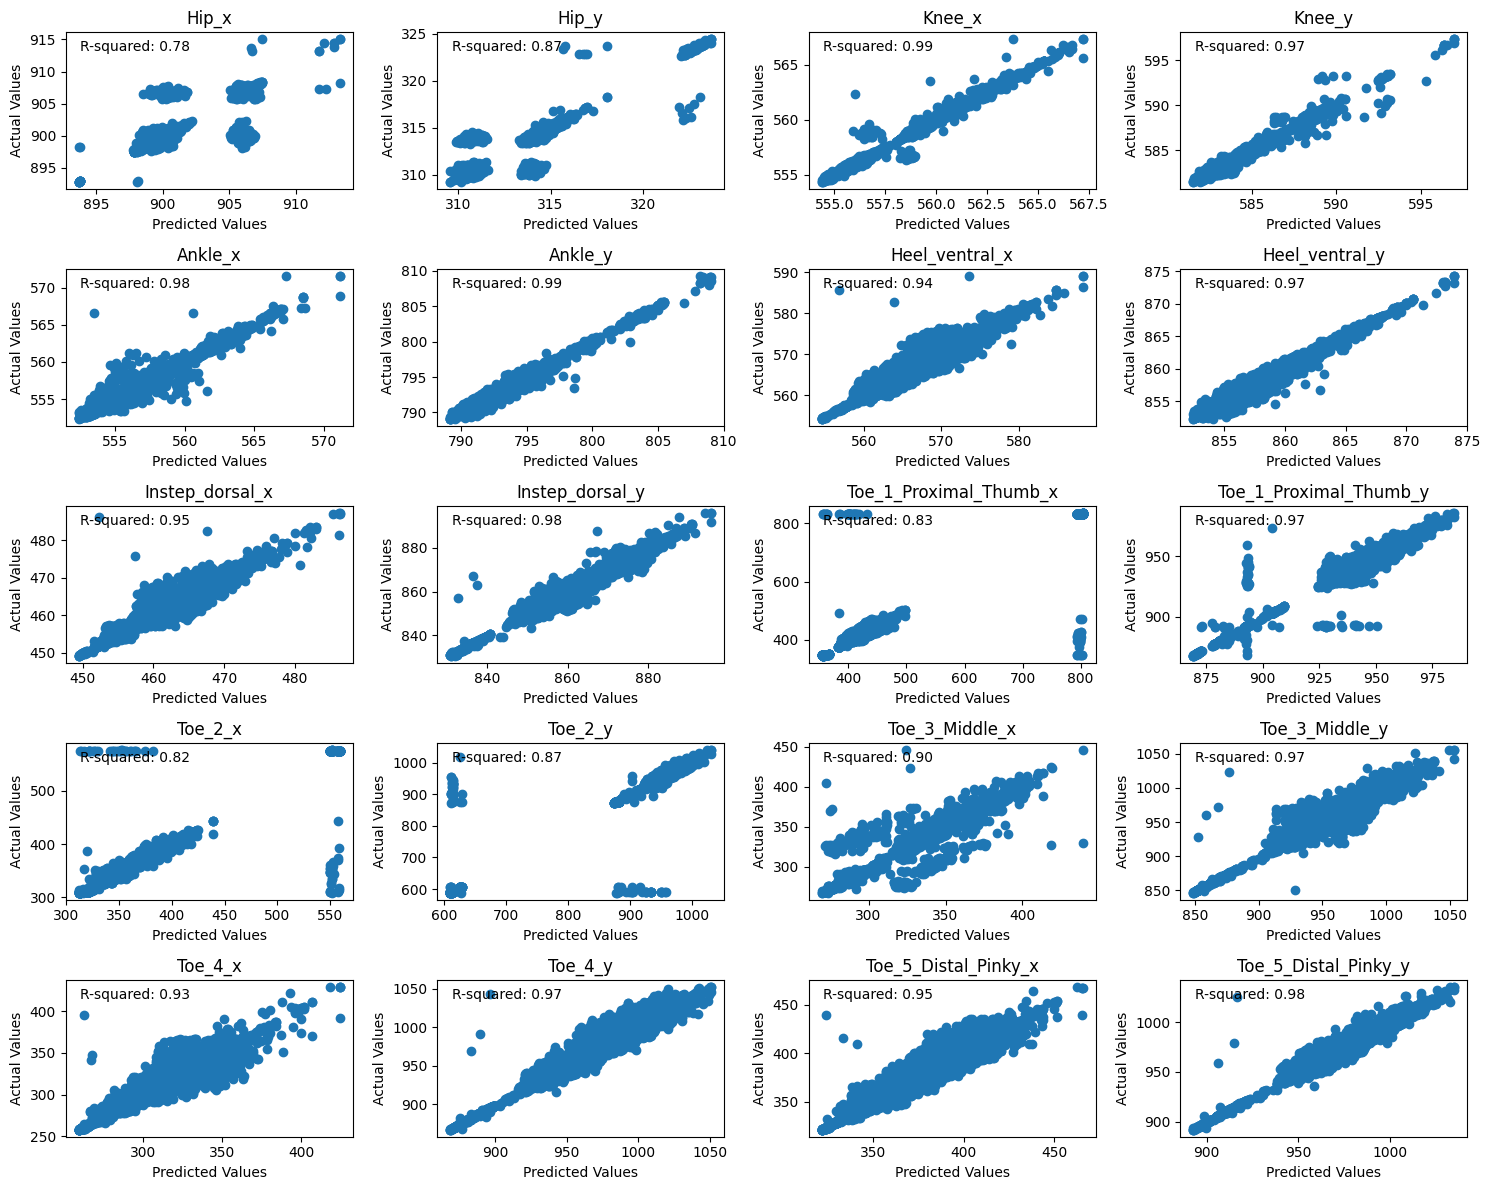

In [87]:
fig_title = 'OLS model'

# Iterate over the models
fig, axs = plt.subplots(5, 4, figsize=(15, 12))

for i, model in enumerate(models):
    
    # Remove '_normalized' from the title
    title = outcome[i].replace('_normalized', '')
    
    # Plot the predicted values against the actual values for x
    axs[i // 4, i % 4].scatter(model.fittedvalues, model.model.endog)
    axs[i // 4, i % 4].set_xlabel('Predicted Values')
    axs[i // 4, i % 4].set_ylabel('Actual Values')
    axs[i // 4, i % 4].set_title(title)  # Set the modified title

    # Calculate R-squared value
    r_squared_x = model.rsquared
    
    # Add R-squared value to the plot
    axs[i // 4, i % 4].text(0.05, 0.95, f'R-squared: {r_squared_x:.2f}', transform=axs[i // 4, i % 4].transAxes, ha='left', va='top')

plt.tight_layout()
plt.savefig(fig_title) # Save the figure before showing it
plt.show()



In [88]:
for model in models:
    coefficients = model.params
    print(coefficients)

## The coefficient for the lagged position parameter is very high. This is likely due to the fact that the lagged position is very similar to the current position. I will try to remove the lagged position parameter and see if the model works.

Intercept       108.831084
Stim_Freq        -0.006447
Time             -0.000036
Hip_x_lagged      0.879328
dtype: float64
Intercept       22.197123
Stim_Freq       -0.004679
Time             0.000032
Hip_y_lagged     0.929534
dtype: float64
Intercept        10.521930
Stim_Freq        -0.004034
Time             -0.000041
Knee_x_lagged     0.981355
dtype: float64
Intercept        16.692964
Stim_Freq        -0.002889
Time             -0.000027
Knee_y_lagged     0.971545
dtype: float64
Intercept         24.112041
Stim_Freq         -0.013653
Time              -0.000138
Ankle_x_lagged     0.957380
dtype: float64
Intercept         8.850478e+00
Stim_Freq        -1.296071e-03
Time             -6.715935e-07
Ankle_y_lagged    9.888868e-01
dtype: float64
Intercept                23.003442
Stim_Freq                -0.009311
Time                     -0.000215
Heel_ventral_x_lagged     0.960007
dtype: float64
Intercept                14.989314
Stim_Freq                -0.001285
Time                 

In [92]:
import numpy as np

# Dictionary to store the average coefficients
average_coefficients = {'_lagged': []}

# Iterate over the models
for model in models:
    # Get the coefficients from the model
    coefficients = model.params
    
    # Calculate the mean coefficient for each parameter
    for param in coefficients.index:
        if param == 'Intercept' or param == 'Stim Freq' or param == 'Time':
            if param in average_coefficients:
                average_coefficients[param].append(coefficients[param])
            else:
                average_coefficients[param] = [coefficients[param]]
        elif '_lagged' in param:
            average_coefficients['_lagged'].append(coefficients[param])

# Calculate the average of the coefficients for each parameter
for param in average_coefficients:
    average_coefficients[param] = np.mean(average_coefficients[param])

# Print the average coefficients
for param, avg_coef in average_coefficients.items():
    print(f"{param}: {avg_coef}")

_lagged: 0.9579906203368875
Intercept: 25.44282800693535
Time: -0.0005654929694296132


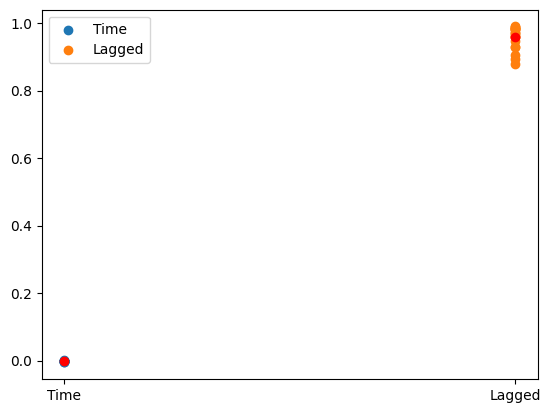

In [97]:
import matplotlib.pyplot as plt

# Lists to store the coefficients
times = []
lagged = []

# Iterate over the models
for model in models:
    # Get the coefficients from the model
    coefficients = model.params
    
    # Store the coefficients in the appropriate list
    if 'Time' in coefficients:
        times.append(coefficients['Time'])
    for param in coefficients.index:
        if '_lagged' in param:
            lagged.append(coefficients[param])

# Create the scatter plot
plt.scatter(['Time'] * len(times), times, label='Time')
plt.scatter(['Lagged'] * len(lagged), lagged, label='Lagged')

# Plot the averages
plt.scatter(['Time', 'Lagged'], [average_coefficients['Time'], average_coefficients['_lagged']], color='red')

plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model
def body_position(amplitude, frequency, time):
    """Calculate the position of the body part at a given time based on the stimulation amplitude and frequency."""
    return amplitude * np.sin(2 * np.pi * frequency * time)

# Set the stimulation parameters
stimulation_type = 'type1'  # This could be used to determine the amplitude
stimulation_frequency = 1  # In Hz

# Map the stimulation type to an amplitude
amplitude = 1 if stimulation_type == 'type1' else 2

# Create a time array
time = np.linspace(0, 1, 1000)  # From 0 to 1 second

# Calculate the body positions
positions = body_position(amplitude, stimulation_frequency, time)

# Plot the results
plt.plot(time, positions)
plt.xlabel('Time (s)')
plt.ylabel('Body Position')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=2)  # Adjust the number of components as needed

# Fit PCA to the data
pca.fit(new_df)

# Transform the data to the new coordinate system
transformed_data = pca.transform(df)

# Print the transformed data
print(transformed_data)

In [ ]:
import matplotlib.pyplot as plt

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

#Cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()

# Elbow plot
explained_variance = pca.explained_variance_ratio_
differences = np.diff(explained_variance)
plt.plot(range(1, len(differences) + 1), differences, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Change in Explained Variance')
plt.title('Elbow Method')
plt.show()
